# F1 Analysis

## Business understanding

Using Kaggle's F1 Data set, I try to answer see whether F1 cars are getting slower but I do so by diving into 3 important sub questions that need attention first:

- Which year had the fastest lap time for each circuit?
- Which track has the biggest improvement in lap time?
- How do lap time vary throughout the years?

## Data understanding

In [53]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
drivers = pd.read_csv('drivers.csv', encoding='ISO-8859–1')
races = pd.read_csv('races.csv', encoding='ISO-8859–1')
laptimes = pd.read_csv('lapTimes.csv', encoding='ISO-8859–1')

In [10]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,10/05/1977,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6.0,ROS,Nico,Rosberg,27/06/1985,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14.0,ALO,Fernando,Alonso,29/07/1981,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,19/10/1981,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [11]:
races.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [12]:
laptimes.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [14]:
drivers.isnull().sum()

driverId         0
driverRef        0
number         804
code           757
forename         0
surname          0
dob              1
nationality      0
url              1
dtype: int64

In [15]:
races.isnull().sum()

raceId         0
year           0
round          0
circuitId      0
name           0
date           0
time         731
url            0
dtype: int64

In [16]:
laptimes.isnull().sum()

raceId          0
driverId        0
lap             0
position        0
time            0
milliseconds    0
dtype: int64

## Preparing Data

In [23]:
joined_df = laptimes.merge(drivers, on='driverId')
joined_df.head()

,raceId,driverId,lap,position,time,milliseconds,driverRef,number,code,forename,surname,dob,nationality,url
0,841,20,1,1,1:38.109,98109,vettel,5.0,VET,Sebastian,Vettel,03/07/1987,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
1,841,20,2,1,1:33.006,93006,vettel,5.0,VET,Sebastian,Vettel,03/07/1987,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
2,841,20,3,1,1:32.713,92713,vettel,5.0,VET,Sebastian,Vettel,03/07/1987,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
3,841,20,4,1,1:32.803,92803,vettel,5.0,VET,Sebastian,Vettel,03/07/1987,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
4,841,20,5,1,1:32.342,92342,vettel,5.0,VET,Sebastian,Vettel,03/07/1987,German,http://en.wikipedia.org/wiki/Sebastian_Vettel


In [25]:
df = joined_df.merge(races, on='raceId')
df.head()

,raceId,driverId,lap,position,time_x,milliseconds,driverRef,number,code,forename,...,dob,nationality,url_x,year,round,circuitId,name,date,time_y,url_y
0,841,20,1,1,1:38.109,98109,vettel,5.0,VET,Sebastian,...,03/07/1987,German,http://en.wikipedia.org/wiki/Sebastian_Vettel,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...
1,841,20,2,1,1:33.006,93006,vettel,5.0,VET,Sebastian,...,03/07/1987,German,http://en.wikipedia.org/wiki/Sebastian_Vettel,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...
2,841,20,3,1,1:32.713,92713,vettel,5.0,VET,Sebastian,...,03/07/1987,German,http://en.wikipedia.org/wiki/Sebastian_Vettel,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...
3,841,20,4,1,1:32.803,92803,vettel,5.0,VET,Sebastian,...,03/07/1987,German,http://en.wikipedia.org/wiki/Sebastian_Vettel,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...
4,841,20,5,1,1:32.342,92342,vettel,5.0,VET,Sebastian,...,03/07/1987,German,http://en.wikipedia.org/wiki/Sebastian_Vettel,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...


In [27]:
# Checking the percentage of null values per column
df.isnull().sum() / len(df)

raceId          0.000000
driverId        0.000000
lap             0.000000
position        0.000000
time_x          0.000000
milliseconds    0.000000
driverRef       0.000000
number          0.576233
code            0.158272
forename        0.000000
surname         0.000000
dob             0.000000
nationality     0.000000
url_x           0.000000
year            0.000000
round           0.000000
circuitId       0.000000
name            0.000000
date            0.000000
time_y          0.353819
url_y           0.000000
dtype: float64

In [30]:
# Dropping columns with null values because they're not needed to answer the questions
df.drop(['number', 'code', 'time_y'], axis=1, inplace=True)
df.head()

,raceId,driverId,lap,position,time_x,milliseconds,driverRef,forename,surname,dob,nationality,url_x,year,round,circuitId,name,date,url_y
0,841,20,1,1,1:38.109,98109,vettel,Sebastian,Vettel,03/07/1987,German,http://en.wikipedia.org/wiki/Sebastian_Vettel,2011,1,1,Australian Grand Prix,2011-03-27,http://en.wikipedia.org/wiki/2011_Australian_G...
1,841,20,2,1,1:33.006,93006,vettel,Sebastian,Vettel,03/07/1987,German,http://en.wikipedia.org/wiki/Sebastian_Vettel,2011,1,1,Australian Grand Prix,2011-03-27,http://en.wikipedia.org/wiki/2011_Australian_G...
2,841,20,3,1,1:32.713,92713,vettel,Sebastian,Vettel,03/07/1987,German,http://en.wikipedia.org/wiki/Sebastian_Vettel,2011,1,1,Australian Grand Prix,2011-03-27,http://en.wikipedia.org/wiki/2011_Australian_G...
3,841,20,4,1,1:32.803,92803,vettel,Sebastian,Vettel,03/07/1987,German,http://en.wikipedia.org/wiki/Sebastian_Vettel,2011,1,1,Australian Grand Prix,2011-03-27,http://en.wikipedia.org/wiki/2011_Australian_G...
4,841,20,5,1,1:32.342,92342,vettel,Sebastian,Vettel,03/07/1987,German,http://en.wikipedia.org/wiki/Sebastian_Vettel,2011,1,1,Australian Grand Prix,2011-03-27,http://en.wikipedia.org/wiki/2011_Australian_G...


In [31]:
df.isnull().sum() / len(df)

raceId          0.0
driverId        0.0
lap             0.0
position        0.0
time_x          0.0
milliseconds    0.0
driverRef       0.0
forename        0.0
surname         0.0
dob             0.0
nationality     0.0
url_x           0.0
year            0.0
round           0.0
circuitId       0.0
name            0.0
date            0.0
url_y           0.0
dtype: float64

## Q1: Which year had the fastest lap time for each circuit?

In [104]:
grouped_circuit = df.groupby(['name'], as_index=False).min('milliseconds')
grouped_circuit.head()

,name,raceId,driverId,lap,position,milliseconds,year,round,circuitId
0,Abu Dhabi Grand Prix,17,1,1,1,100279,2009,17,24
1,Argentine Grand Prix,193,14,1,1,87981,1996,3,25
2,Australian Grand Prix,1,1,1,1,84125,1996,1,1
3,Austrian Grand Prix,113,1,1,1,67411,1997,6,23
4,Azerbaijan Grand Prix,976,1,1,1,103441,2017,8,73


In [196]:
circuit_year_f = grouped_circuit[['name', 'milliseconds', 'year']]
circuit_year_f.head(35)

,name,milliseconds,year
0,Abu Dhabi Grand Prix,100279,2009
1,Argentine Grand Prix,87981,1996
2,Australian Grand Prix,84125,1996
3,Austrian Grand Prix,67411,1997
4,Azerbaijan Grand Prix,103441,2017
5,Bahrain Grand Prix,90252,2004
6,Belgian Grand Prix,105108,1996
7,Brazilian Grand Prix,71044,1996
8,British Grand Prix,78739,1996
9,Canadian Grand Prix,73622,1996


In [130]:
grouped_circuit['year'].value_counts()

1996    16
1997     2
2004     2
2009     1
2017     1
2011     1
2010     1
1999     1
2015     1
2014     1
2008     1
2005     1
2000     1
Name: year, dtype: int64

## Evaluation and Findings

- The data was grouped by track name and the minimum (i.e. fastest) lap times in milliseconds were extracted 
- From the above value counts you can see that 1996 had the fastest lap times at 16 circuits, significantly outperfoming the rest of the years
- 1997 and 2004 follow with 2 fastest laps 

## Q2: Which track has the biggest improvement in lap time?

In [167]:
grouped_min = df.groupby('name', as_index=False).min('millisecond')
grouped_min.head()

,name,raceId,driverId,lap,position,milliseconds,year,round,circuitId
0,Abu Dhabi Grand Prix,17,1,1,1,100279,2009,17,24
1,Argentine Grand Prix,193,14,1,1,87981,1996,3,25
2,Australian Grand Prix,1,1,1,1,84125,1996,1,1
3,Austrian Grand Prix,113,1,1,1,67411,1997,6,23
4,Azerbaijan Grand Prix,976,1,1,1,103441,2017,8,73


In [168]:
grouped_max = df.groupby('name', as_index=False).max('millisecond')
grouped_max.head()

,name,raceId,driverId,lap,position,milliseconds,year,round,circuitId
0,Abu Dhabi Grand Prix,988,843,55,24,174331,2017,21,24
1,Argentine Grand Prix,226,85,72,22,941618,1998,3,25
2,Australian Grand Prix,969,841,58,22,1243269,2017,3,1
3,Austrian Grand Prix,977,840,71,22,564047,2017,14,70
4,Azerbaijan Grand Prix,976,840,51,20,1703939,2017,8,73


In [173]:
grouped_max['milliseconds_diff'] = grouped_max['milliseconds'] - grouped_min['milliseconds']
grouped_max.head()

,name,raceId,driverId,lap,position,milliseconds,year,round,circuitId,milliseconds_diff
0,Abu Dhabi Grand Prix,988,843,55,24,174331,2017,21,24,74052
1,Argentine Grand Prix,226,85,72,22,941618,1998,3,25,853637
2,Australian Grand Prix,969,841,58,22,1243269,2017,3,1,1159144
3,Austrian Grand Prix,977,840,71,22,564047,2017,14,70,496636
4,Azerbaijan Grand Prix,976,840,51,20,1703939,2017,8,73,1600498


In [193]:
grouped_max.sort_values('milliseconds_diff', ascending=False)

,name,raceId,driverId,lap,position,milliseconds,year,round,circuitId,milliseconds_diff
9,Canadian Grand Prix,975,840,70,24,7507547,2017,9,7,7433925
8,British Grand Prix,978,840,61,24,3803459,2017,11,9,3724720
20,Malaysian Grand Prix,983,842,56,24,3138842,2017,17,2,3044762
18,Korean Grand Prix,894,824,55,24,2942501,2013,17,35,2842896
7,Brazilian Grand Prix,987,843,72,24,2126744,2017,20,18,2055700
4,Azerbaijan Grand Prix,976,840,51,20,1703939,2017,8,73,1600498
22,Monaco Grand Prix,974,840,78,23,1612127,2017,7,6,1537688
28,Turkish Grand Prix,844,816,58,24,1617815,2011,14,5,1533045
11,European Grand Prix,955,837,69,24,1453884,2016,17,73,1375530
17,Japanese Grand Prix,984,842,67,24,1300684,2017,18,22,1222258


## Evaluation and Findings

- The data was grouped twice to find the fastest and slowest laptimes per track, then the differences between them was found and sorted
- The Canadian Grand Prix saw the largest change in laptimes, increasing by 7433925 milliseconds
- The British Grand Prix follows second but difference is almost halved

## Q3: How do lap time vary throughout the years?

In [94]:
grouped_year_name = df.groupby(['year', 'name'], as_index=False).mean()
grouped.head()

,year,name,raceId,driverId,lap,position,milliseconds,round,circuitId
0,1996,Argentine Grand Prix,226.0,55.159498,29.957885,9.084229,98446.646057,3.0,25.0
1,1996,Australian Grand Prix,224.0,56.032020,25.992611,7.831281,99021.050493,1.0,1.0
2,1996,Belgian Grand Prix,236.0,58.083333,20.498333,7.508333,122689.933333,13.0,13.0
3,1996,Brazilian Grand Prix,225.0,59.045372,30.754083,8.854809,96868.486388,2.0,18.0
4,1996,British Grand Prix,233.0,51.815242,27.364896,7.923788,93658.725173,10.0,9.0


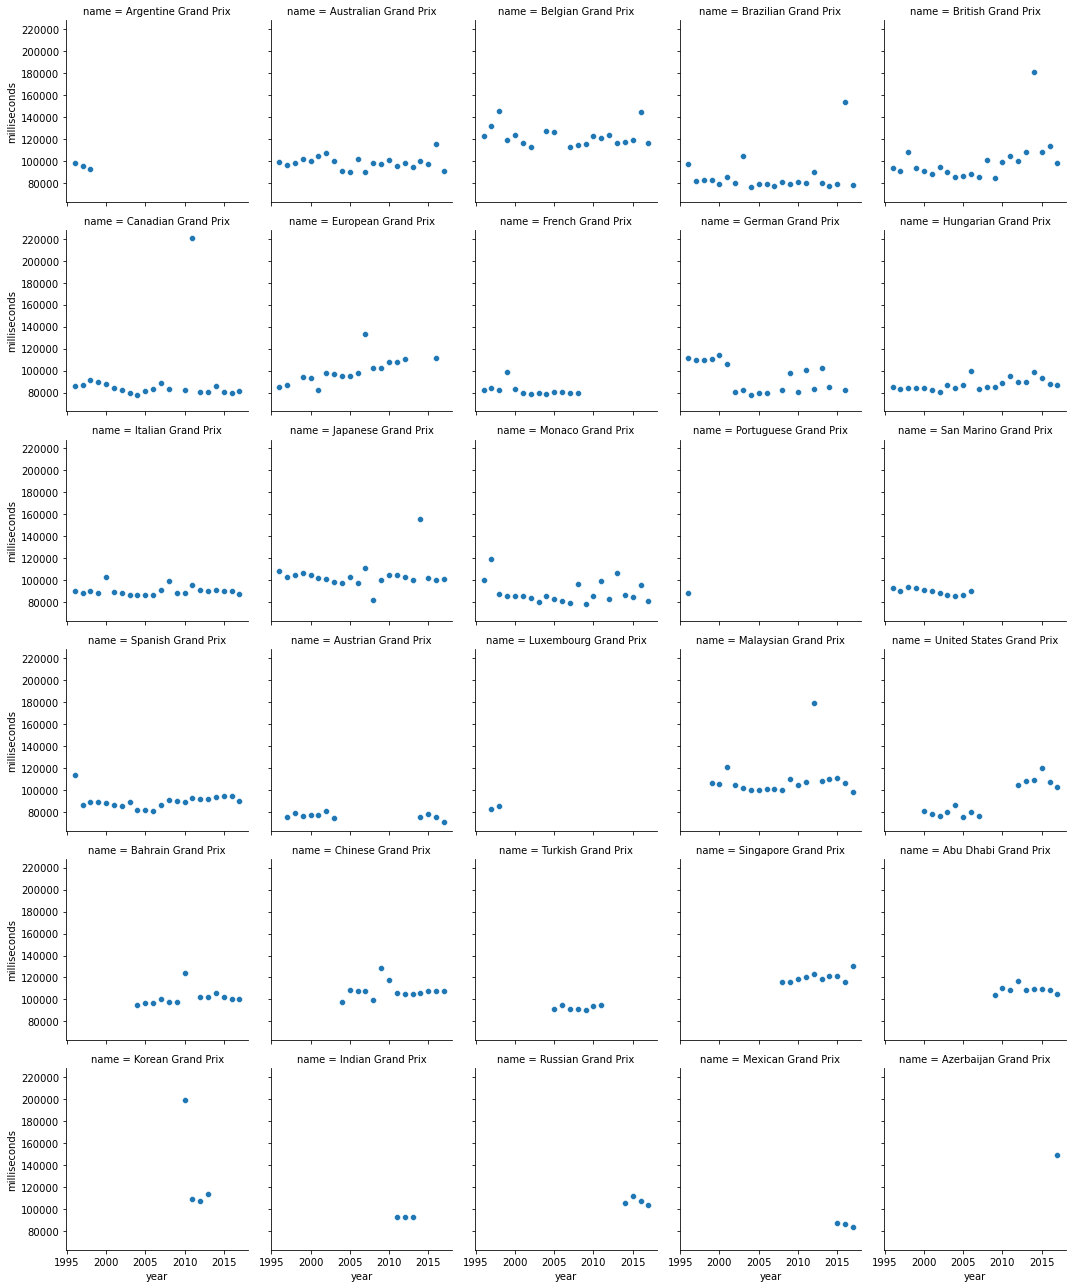

In [101]:
plot = sns.FacetGrid(grouped, col='name', col_wrap=5)
plot.map(sns.scatterplot, 'year', 'milliseconds')

## Evaluation and Findings

- The data was grouped again but this time for the average laptimes to improve fairness over the years
- In general laptimes stayed somewhat consistent throughout the years 
- Tracks such as the European Grand Prix saw its lap time getting slower over the years whilst the German Grand Prix saw a sharp decrease in lap times from the year ~2000 onwards
- There is also a sharp increase in lap times at the United States Grand Prix after no races between ~2006 and ~2012
- For those tracks that have been raced on for many years there are some years that recorded anomolous results such as Brazilian, British, Canadian, Japanese and Malaysian Grand Prix's. These outliers are also all significantly slower than the normal trend.